# Date and time data types

This notebook will show many ways that pandas handles date and time data types and will use these to explore Citi Bike trips

In [2]:
import pandas as pd
import seaborn as sns

1. Download Citi Bike data from https://s3.amazonaws.com/tripdata/202409-citibike-tripdata.zip and unzip
2. Move `202409-citibike-tripdata_1.csv` to `../Data/Source Data`

In [ ]:
trips = pd.read_csv('../Data/Source Data/202409-citibike-tripdata_1.csv')

By default, pandas will not interpret datetime values; they are loaded as `str` values in a `object`-type column

In [4]:
trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,D86F678648E7A867,electric_bike,2024-09-10 22:50:16.212,2024-09-10 23:30:44.697,Hudson St & W 13 St,6115.06,Broadway & W 58 St,6948.10,40.740057,-74.005274,40.766953,-73.981693,casual
1,032D1788CD512084,electric_bike,2024-09-22 05:51:00.609,2024-09-22 05:56:50.446,W 37 St & 5 Ave,6398.06,9 Ave & W 45 St,6717.06,40.750380,-73.983390,40.760193,-73.991255,member
2,DA55381E5121F0F9,electric_bike,2024-09-24 11:07:40.618,2024-09-24 11:29:23.460,Greenpoint Ave & West St,5752.09,2 Ave & E 72 St,6925.09,40.729803,-73.959099,40.768762,-73.958408,member
3,F67A042C028C6367,classic_bike,2024-09-03 14:25:28.732,2024-09-03 14:33:51.075,E 85 St & 3 Ave,7212.05,2 Ave & E 72 St,6925.09,40.778012,-73.954071,40.768762,-73.958408,member
4,31F722D5EAB9C780,electric_bike,2024-09-09 15:46:50.376,2024-09-09 15:50:16.411,7 Ave & Park Pl,4125.07,Carroll St & 6 Ave,4019.06,40.677615,-73.973243,40.674089,-73.978728,member


In [5]:
trips.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

## Timestamps

Cast text representation of dates to timestamps (datetime objects) with `pd.to_datetime()`. (It works on a single Series, not the entire DataFrame.)

For faster (and more accurate) parsing, specify the format (with the `strftime` [language](https://strftime.org))

As with `pd.to_numeric()`, the default behavior is to raise an error on hitting a text that can't be converted into a date. Also like `to_numeric`, the option `errors='coerce'` will instead replace these unknowns with `NaT` (not a time, equivalent to `NaN`). But you probably want to check what's wrong before clobbering the data. 

In [6]:
trips['started_at'] = pd.to_datetime(trips['started_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='raise')

In [7]:
trips['ended_at'] = pd.to_datetime(trips['ended_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='raise')

In [8]:
trips.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

### Extracting parts of datetime

(like text data has extra string methods accessed through the `.str.` accessor, datetime objects have extended methods through the `.dt.` accessor. e.g.:)

Extract the hour of the day:

In [9]:
trips['start_hour'] = trips['started_at'].dt.hour

In [10]:
trips['start_hour'].head()

0    22
1     5
2    11
3    14
4    15
Name: start_hour, dtype: int32

In [11]:
(
    trips['start_hour']
    .value_counts()
    .sort_index()
)

start_hour
0     14787
1      8679
2      5861
3      3841
4      3170
5      6433
6     18323
7     40505
8     60206
9     49050
10    42272
11    45897
12    52448
13    55239
14    59576
15    66099
16    75220
17    97048
18    91557
19    68614
20    47086
21    36005
22    29568
23    22516
Name: count, dtype: int64

<Axes: xlabel='start_hour', ylabel='count'>

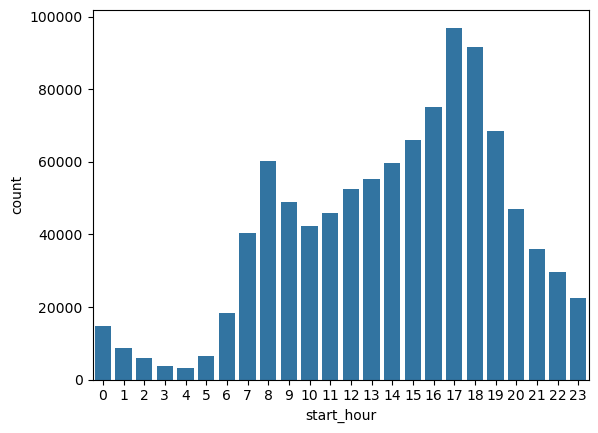

In [12]:
sns.countplot(
    data=trips,
    x='start_hour'
)

In [13]:
trips['start_day_of_week'] = trips['started_at'].dt.day_of_week

In [14]:
trips['start_day_of_week'].head()

0    1
1    6
2    1
3    1
4    0
Name: start_day_of_week, dtype: int32

<Axes: xlabel='start_day_of_week', ylabel='count'>

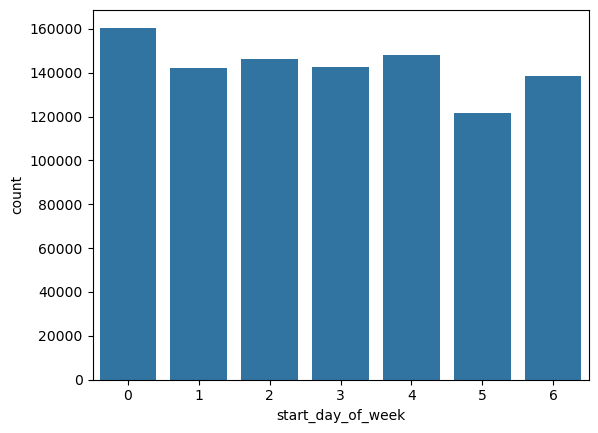

In [15]:
sns.countplot(
    data=trips,
    x='start_day_of_week',
)

You might need to check the [docs](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek) to know what these numbers mean: 0 = Monday, 6 = Sunday

Use a dictionary to add day labels:

In [112]:
day_numbers_day_names = {
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thu',
    4:'Fri',
    5:'Sat',
    6:'Sun'
}

use `.map()` with a dictionary to get the associated value for each matching key 

In [114]:
trips['start_day_of_week_name'] = trips['start_day_of_week'].map(day_numbers_day_names)

(bonus: or use built-in `dt.day_name()` to get name)

In [ ]:
# trips['start_day_of_week_name'] = trips['started_at'].dt.day_name()

(bonus: or, use use `strftime` formatting to get the day of the week)

In [ ]:
# trips['start_day_of_week_name'] = trips['started_at'].dt.strftime('%a')

(use the list of values to set the order (otherwise they will sort alphabetically))

<Axes: xlabel='start_day_of_week_name', ylabel='count'>

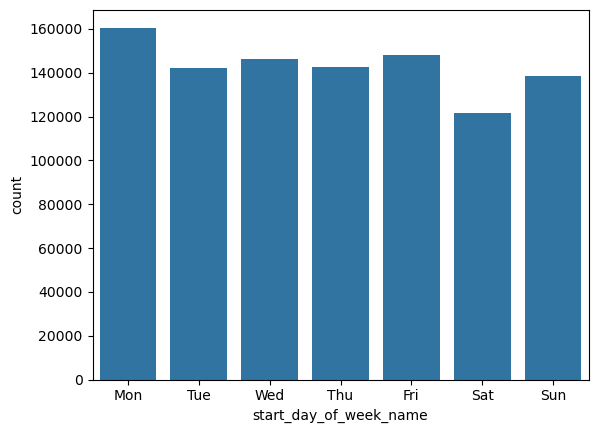

In [115]:
sns.countplot(
    data=trips,
    x='start_day_of_week_name',
    order=day_numbers_day_names.values()
)

In [ ]:
trips['weekend'] = trips['started_at'].dt.day_of_week.ge(5)

<Axes: xlabel='start_day_of_week_name', ylabel='count'>

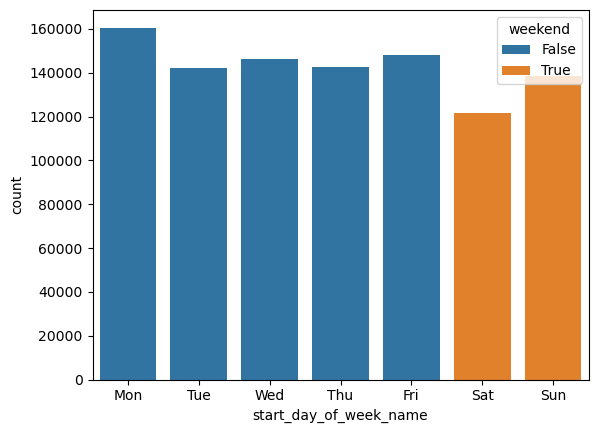

In [93]:
sns.countplot(
    data=trips,
    x='start_day_of_week_name',
    hue='weekend',
    order=day_numbers_day_names.values()
)

<Axes: xlabel='start_hour', ylabel='count'>

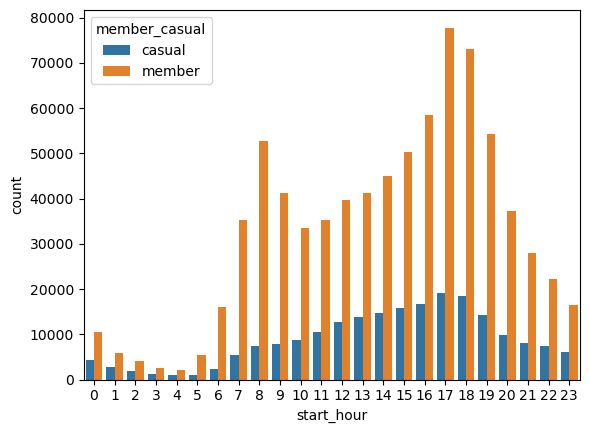

In [151]:
sns.countplot(
    data=trips,
    x='start_hour',
    hue='member_casual'
)

Cast timestamps as text with a specified format using `.strftime()` (using the `strftime` [codes](https://strftime.org/))

In [119]:
trips['started_at'].dt.strftime('%m/%d/%y')

0         09/10/24
1         09/22/24
2         09/24/24
3         09/03/24
4         09/09/24
            ...   
999995    09/17/24
999996    09/14/24
999997    09/16/24
999998    09/01/24
999999    09/01/24
Name: started_at, Length: 1000000, dtype: object

In [123]:
trips['started_at'].dt.strftime('%B %d, %Y %I:%M%p')

0         September 10, 2024 10:50PM
1         September 22, 2024 05:51AM
2         September 24, 2024 11:07AM
3         September 03, 2024 02:25PM
4         September 09, 2024 03:46PM
                     ...            
999995    September 17, 2024 04:35PM
999996    September 14, 2024 11:18AM
999997    September 16, 2024 05:32PM
999998    September 01, 2024 04:35PM
999999    September 01, 2024 12:02AM
Name: started_at, Length: 1000000, dtype: object

## Durations

Data representing lengths/amounts of time

In [21]:
trips['duration'] = trips['ended_at'] - trips['started_at']

This is a different sort of time type: a `timedelta`. It represents a duration of time, but unmoored from any particular date and time.

In [22]:
trips['duration'].head()

0   0 days 00:40:28.485000
1   0 days 00:05:49.837000
2   0 days 00:21:42.842000
3   0 days 00:08:22.343000
4   0 days 00:03:26.035000
Name: duration, dtype: timedelta64[ns]

`timedelta`s can be summarized

In [23]:
trips['duration'].max()

Timedelta('1 days 00:59:56.080000')

In [24]:
trips['duration'].mean()

Timedelta('0 days 00:13:15.889412034')

`timedelta`s can only be compared to other `timedeltas`. this will raise an error:

In [28]:
# trips['duration'].gt(5)

But we can create a fixed `timedelta` for a comparison:

In [25]:
FIVE_MINUTE_DURATION = pd.Timedelta(minutes=5)

# FIVE_MINUTE_DURATION = pd.Timedelta('5 min')  # <-- this works too

trips['duration'].gt(FIVE_MINUTE_DURATION).head()

0     True
1     True
2     True
3     True
4    False
Name: duration, dtype: bool

as a data check, make sure all the durations are positive

In [26]:
(
    trips['duration']
    .ge(pd.Timedelta(0))
    .all()
)

True

To visualize or work with `timedelta` outside of pandas, we'll need to convert these to numeric units.

We can convert the `timedelta` to any other unit just by dividing each duration duration of a single target unit:

In [28]:
trips['duration_minutes'] = trips['duration'] / pd.Timedelta(minutes=1)

trips['duration_minutes'].head()

0    40.474750
1     5.830617
2    21.714033
3     8.372383
4     3.433917
Name: duration_minutes, dtype: float64

Or extract the total seconds: 

In [34]:
trips['duration_seconds'] = trips['duration'].dt.total_seconds()

trips['duration_seconds'].head()

0    561.0
1    532.0
2    402.0
3    306.0
4    350.0
Name: duration_seconds, dtype: float64

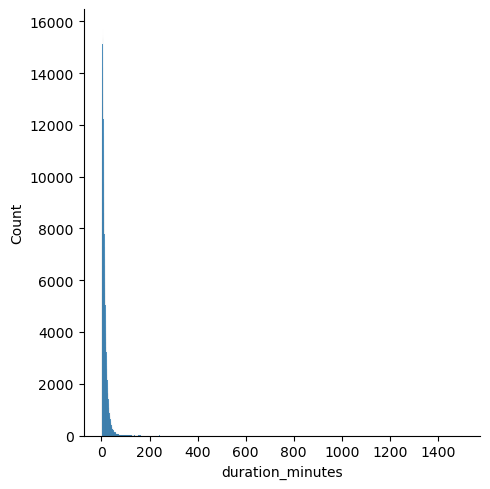

In [29]:
sns.displot(
    data=trips,
    x='duration_minutes'
)

In [31]:
trips_under_two_hours = (
    trips
    [
        trips['duration_minutes'].lt(120)
    ]
)

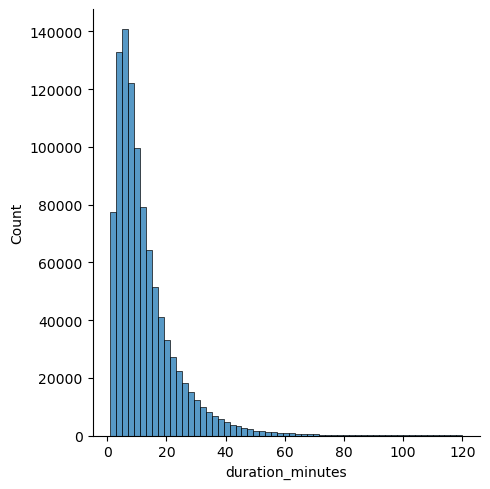

In [33]:
sns.displot(
    data=trips_under_two_hours,
    x='duration_minutes',
    binwidth=2
)

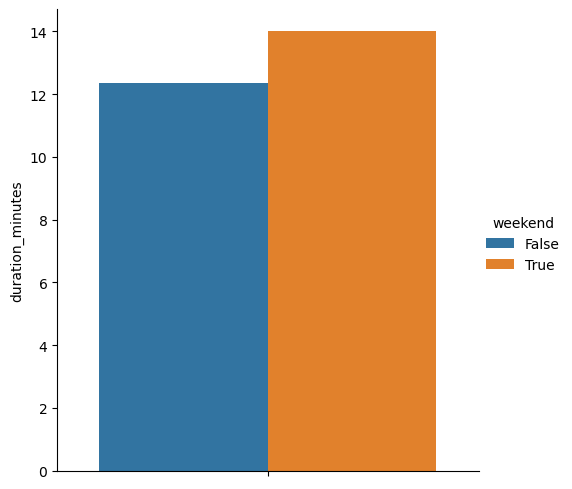

In [144]:
sns.catplot(
    data=trips_under_two_hours,
    y='duration_minutes',
    hue='weekend',
    kind='bar',
    errorbar=None
)

In [145]:
trips['member_casual'].value_counts()

member_casual
member    788421
casual    211579
Name: count, dtype: int64

In [146]:
(
    trips_under_two_hours
    .groupby('member_casual')
    ['duration_minutes']
    .agg(['mean','median'])
)

,mean,median
member_casual,,
casual,17.265254,13.045867
member,11.586907,8.781067


## Frequency

Data recorded at regular intervals (daily, weekly, monthly, yearly etc.)


### Weather revisited

What are the typical temperatures each month?

With the `parse_dates` argument we can direct pandas to convert date text to `datetime` type when reading in a csv file. 

You'll need to know the structure of the file in advance, or you can read in a few rows and inspect:



In [158]:
weather_data_source_url = 'https://raw.githubusercontent.com/dlevine01/urban-data-analysis-course/refs/heads/main/Data/Source%20Data/weather_data_nyc_centralpark_2016.csv'

In [ ]:
# inspect first few rows:

In [159]:
pd.read_csv(
    weather_data_source_url,
    nrows=3
)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.0,0.0,0
1,2-1-2016,40,32,36.0,0.0,0.0,0
2,3-1-2016,45,35,40.0,0.0,0.0,0


Check for the name of the column(s) to parse and the format. Then add those as arguments to `read_csv`:

In [160]:
weather = pd.read_csv(
    weather_data_source_url,
    parse_dates=['date'],
    date_format='%d-%m-%Y'
)

In [161]:
weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2016-01-01,42,34,38.0,0.00,0.0,0
1,2016-01-02,40,32,36.0,0.00,0.0,0
2,2016-01-03,45,35,40.0,0.00,0.0,0
3,2016-01-04,36,14,25.0,0.00,0.0,0
4,2016-01-05,29,11,20.0,0.00,0.0,0


In [ ]:
weather.dtypes

date                   datetime64[ns]
maximum temperature             int64
minimum temperature             int64
average temperature           float64
precipitation                  object
snow fall                      object
snow depth                     object
dtype: object

For frequency data, it is often convenient to set the date/time column as the index:

In [169]:
weather = weather.set_index('date')

weather

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
date,,,,,,
2016-01-01,42,34,38.0,0.00,0.0,0
2016-01-02,40,32,36.0,0.00,0.0,0
2016-01-03,45,35,40.0,0.00,0.0,0
2016-01-04,36,14,25.0,0.00,0.0,0
2016-01-05,29,11,20.0,0.00,0.0,0
...,...,...,...,...,...,...
2016-12-27,60,40,50.0,0,0,0
2016-12-28,40,34,37.0,0,0,0
2016-12-29,46,33,39.5,0.39,0,0


In [170]:
weather['maximum temperature']

date
2016-01-01    42
2016-01-02    40
2016-01-03    45
2016-01-04    36
2016-01-05    29
              ..
2016-12-27    60
2016-12-28    40
2016-12-29    46
2016-12-30    40
2016-12-31    44
Name: maximum temperature, Length: 366, dtype: int64

Line plots are a good way to view frequency data.

<Axes: xlabel='date'>

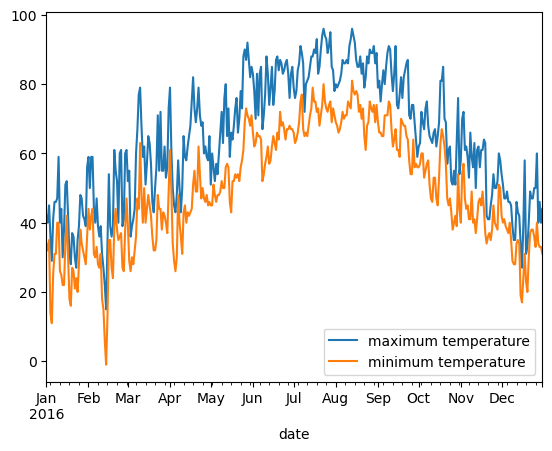

In [171]:
(
    weather
    [[
        'maximum temperature',
        'minimum temperature',
    ]]
    .plot.line()
)

### Resampling

A common task is to resample datatime data, i.e. to summarize records by hour, day, month, etc.


With data that already have a datetime index, use `resample()`

In [ ]:
# mean monthly high and low temperature

(
    weather
    [['minimum temperature','maximum temperature']]
    .resample('ME') # ME for 'month end'
    .mean()

)

,minimum temperature,maximum temperature
date,,
2016-01-31,28.129032,40.774194
2016-02-29,30.586207,44.827586
2016-03-31,40.354839,57.387097
2016-04-30,44.433333,62.233333
2016-05-31,54.967742,70.612903
2016-06-30,63.566667,80.933333
2016-07-31,71.096774,86.258065
2016-08-31,71.774194,86.580645
2016-09-30,64.566667,79.033333


For data that have datetime values but do not have a frequency index (e.g. the Citi Bike trips), the auxiliary `pd.Grouper()` function can be used in a `groupby` to resample.

In [149]:
# median trip duration by day

(
    trips
    .groupby(
        pd.Grouper(key='started_at',freq='D')
    )
    ['duration']
    .median()
)

started_at
2024-08-31   0 days 00:25:24.477500
2024-09-01   0 days 00:10:42.093000
2024-09-02   0 days 00:10:45.286500
2024-09-03   0 days 00:09:22.999000
2024-09-04   0 days 00:09:22.085000
2024-09-05   0 days 00:09:33.644000
2024-09-06   0 days 00:09:35.241500
2024-09-07   0 days 00:09:55.939000
2024-09-08   0 days 00:10:39.426000
2024-09-09   0 days 00:09:15.732500
2024-09-10   0 days 00:09:35.085500
2024-09-11   0 days 00:09:33.428000
2024-09-12   0 days 00:09:29.205500
2024-09-13   0 days 00:09:34.197000
2024-09-14   0 days 00:11:10.733500
2024-09-15   0 days 00:10:31.662500
2024-09-16   0 days 00:09:04.774000
2024-09-17   0 days 00:09:15.544000
2024-09-18   0 days 00:09:04.096000
2024-09-19   0 days 00:09:22.323000
2024-09-20   0 days 00:09:29.322000
2024-09-21   0 days 00:10:50.898000
2024-09-22   0 days 00:10:21.042500
2024-09-23   0 days 00:08:40.295500
2024-09-24   0 days 00:09:12.272000
2024-09-25   0 days 00:08:55.652000
2024-09-26   0 days 00:08:55.719000
2024-09-27   0 da

In [150]:
# median trip duration by week (starting Monday)

(
    trips
    .groupby(
        pd.Grouper(key='started_at',freq='W-MON')
    )
    ['duration']
    .median()
)

started_at
2024-09-02   0 days 00:10:46.174000
2024-09-09   0 days 00:09:38.843000
2024-09-16   0 days 00:09:49.194500
2024-09-23   0 days 00:09:33.268000
2024-09-30   0 days 00:08:57.399000
Freq: W-MON, Name: duration, dtype: timedelta64[ns]

`pd.Grouper` can be combined with other factors for multi-level grouping

In [46]:
# mean trip duration by week (starting Monday)

(
    trips
    .groupby([
        pd.Grouper(key='started_at',freq='W-MON'),
        'member_casual'
    ])
    ['duration']
    .median()
    .unstack()
)

member_casual,casual,member
started_at,,
2024-09-02,0 days 00:15:43.837000,0 days 00:09:00.593000
2024-09-09,0 days 00:13:05.150000,0 days 00:08:53.613000
2024-09-16,0 days 00:13:24.610000,0 days 00:08:58.970000
2024-09-23,0 days 00:13:04.859000,0 days 00:08:47.372500
2024-09-30,0 days 00:11:52.729000,0 days 00:08:22.519000


### datetime index

For data summarized by a date or time unit (e.g. hourly, weekly, monthly), is it often useful to use this datetime value as the index of the dataframe.



In [179]:
median_trip_duration_by_hour_by_member_casual = (
    trips
    .groupby([
        pd.Grouper(key='started_at',freq='h'),
        'member_casual'
    ])
    ['duration']
    .median()
    .unstack()
)

median_trip_duration_by_hour_by_member_casual

member_casual,casual,member
started_at,,
2024-08-31 15:00:00,0 days 10:20:44.032000,NaT
2024-08-31 16:00:00,0 days 09:20:26.694500,NaT
2024-08-31 17:00:00,0 days 16:54:21.513500,NaT
2024-08-31 18:00:00,0 days 10:17:00.573000,NaT
2024-08-31 19:00:00,0 days 06:52:36.645000,NaT
...,...,...
2024-09-30 19:00:00,0 days 00:11:11.049500,0 days 00:08:20.435500
2024-09-30 20:00:00,0 days 00:11:35.861000,0 days 00:08:05.232000
2024-09-30 21:00:00,0 days 00:11:41.614500,0 days 00:07:52.677000


this shows that we have some trips that started in the previous month. Let's filter this to just started_at hours in September.

With a datetime index, we can use `.loc` indexing using strings to represent dates (internally, they are converted to datetimes and used as range indexers)

In [48]:
median_trip_duration_by_hour_by_member_casual = (
    median_trip_duration_by_hour_by_member_casual
    .loc['2024-09']
)

median_trip_duration_by_hour_by_member_casual

member_casual,casual,member
started_at,,
2024-09-01 00:00:00,0 days 00:12:21.406000,0 days 00:09:47.781000
2024-09-01 01:00:00,0 days 00:11:42.706000,0 days 00:09:39.713000
2024-09-01 02:00:00,0 days 00:12:21.852000,0 days 00:10:20.020000
2024-09-01 03:00:00,0 days 00:12:34.838000,0 days 00:08:45.628000
2024-09-01 04:00:00,0 days 00:14:13.019000,0 days 00:07:43.574000
...,...,...
2024-09-30 19:00:00,0 days 00:11:11.049500,0 days 00:08:20.435500
2024-09-30 20:00:00,0 days 00:11:35.861000,0 days 00:08:05.232000
2024-09-30 21:00:00,0 days 00:11:41.614500,0 days 00:07:52.677000


we can use that method to select a range of dates, too:

In [180]:
(
    median_trip_duration_by_hour_by_member_casual
    .loc['2024-09-06':'2024-09-08']
)

member_casual,casual,member
started_at,,
2024-09-06 00:00:00,0 days 00:11:09.800000,0 days 00:08:47.177000
2024-09-06 01:00:00,0 days 00:09:56.197000,0 days 00:08:45.488500
2024-09-06 02:00:00,0 days 00:11:09.134000,0 days 00:07:18.188000
2024-09-06 03:00:00,0 days 00:11:12.343000,0 days 00:08:44.277000
2024-09-06 04:00:00,0 days 00:12:24.996000,0 days 00:09:52.614000
...,...,...
2024-09-08 19:00:00,0 days 00:14:01.789000,0 days 00:09:20.202000
2024-09-08 20:00:00,0 days 00:13:05.208000,0 days 00:09:02.506000
2024-09-08 21:00:00,0 days 00:10:45.271000,0 days 00:08:33.383000


...or hours

In [181]:
(
    median_trip_duration_by_hour_by_member_casual
    .loc['2024-09-06 15:00':'2024-09-06 17:00']
)

member_casual,casual,member
started_at,,
2024-09-06 15:00:00,0 days 00:12:26.782000,0 days 00:08:58.794000
2024-09-06 16:00:00,0 days 00:14:21.390000,0 days 00:08:41.282000
2024-09-06 17:00:00,0 days 00:13:22.359000,0 days 00:09:31.690500


(note that unlike other list slices, datetime ranges like this are _inclusive_ of the last datetime)

### Seasonality

In [ ]:
(
    trips
    .set_index('started_at')
    .resample('h')
    ['ride_id']
    .count()
)

total_trips_by_hour

started_at
2024-08-31 15:00:00       1
2024-08-31 16:00:00       2
2024-08-31 17:00:00       2
2024-08-31 18:00:00       3
2024-08-31 19:00:00       2
                       ... 
2024-09-30 19:00:00    2288
2024-09-30 20:00:00    1547
2024-09-30 21:00:00    1178
2024-09-30 22:00:00     908
2024-09-30 23:00:00     472
Freq: h, Name: ride_id, Length: 729, dtype: int64

In [189]:
total_trips_by_hour = (
    trips
    .groupby(pd.Grouper(key='started_at',freq='h'))
    ['ride_id']
    .nunique()
)

In [ ]:
# note: this gets the same result:

# (
#     trips
#     .set_index('started_at')
#     .resample('h')
#     ['ride_id']
#     .count()
# )

In [190]:
total_trips_by_hour

started_at
2024-08-31 15:00:00       1
2024-08-31 16:00:00       2
2024-08-31 17:00:00       2
2024-08-31 18:00:00       3
2024-08-31 19:00:00       2
                       ... 
2024-09-30 19:00:00    2288
2024-09-30 20:00:00    1547
2024-09-30 21:00:00    1178
2024-09-30 22:00:00     908
2024-09-30 23:00:00     472
Freq: h, Name: ride_id, Length: 729, dtype: int64

<Axes: xlabel='started_at'>

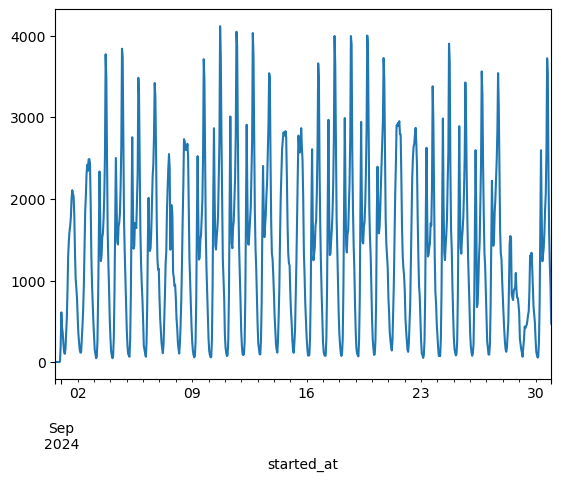

In [191]:
(
    total_trips_by_hour
    .plot.line()
)

<Axes: xlabel='started_at'>

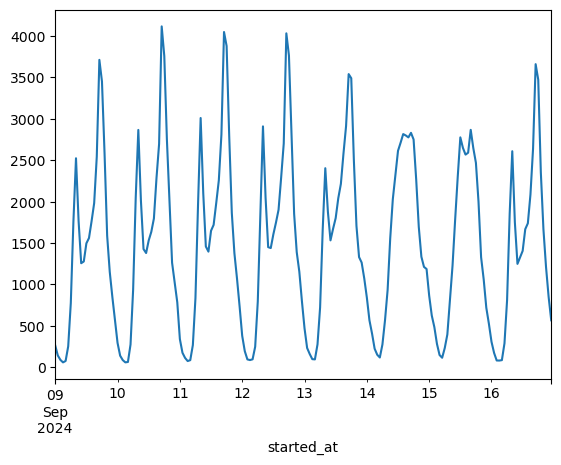

In [193]:
(
    total_trips_by_hour
    .loc['2024-09-09':'2024-09-16']
    .plot.line()
)

Note the periodic fluctuation over the course of each day

### Bonus: shifting times

roll back timestamps to a set frequency with `.dt.floor()`

In [ ]:
trips['started_at'].dt.floor('h')

0        2024-09-10 22:00:00
1        2024-09-22 05:00:00
2        2024-09-24 11:00:00
3        2024-09-03 14:00:00
4        2024-09-09 15:00:00
                 ...        
999995   2024-09-17 16:00:00
999996   2024-09-14 11:00:00
999997   2024-09-16 17:00:00
999998   2024-09-01 16:00:00
999999   2024-09-01 00:00:00
Name: started_at, Length: 1000000, dtype: datetime64[ns]

In [ ]:
trips['started_at'].dt.floor('d')

0        2024-09-10
1        2024-09-22
2        2024-09-24
3        2024-09-03
4        2024-09-09
            ...    
999995   2024-09-17
999996   2024-09-14
999997   2024-09-16
999998   2024-09-01
999999   2024-09-01
Name: started_at, Length: 1000000, dtype: datetime64[ns]

Or we use pandas time offset functionality:

In [135]:
weather['month_end_date'] = (
    weather.index
    .shift(
        periods=1, 
        freq=pd.tseries.offsets.MonthEnd()
    )
)

weather.head()

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,month_year,month_end_date
date,,,,,,,,
2016-01-01,42,34,38.0,0.00,0.0,0,Jan-2016,2016-01-31
2016-01-02,40,32,36.0,0.00,0.0,0,Jan-2016,2016-01-31
2016-01-03,45,35,40.0,0.00,0.0,0,Jan-2016,2016-01-31
2016-01-04,36,14,25.0,0.00,0.0,0,Jan-2016,2016-01-31
2016-01-05,29,11,20.0,0.00,0.0,0,Jan-2016,2016-01-31


pandas has offsets for many useful frequencies:

e.g. the NYC fiscal year starts at the beginning of July. To roll dates back to the first day of the FY:

In [144]:
(
    weather.index
    .shift(
        periods=1, 
        freq=pd.tseries.offsets.YearBegin(month=7)
    )
)

DatetimeIndex(['2016-07-01', '2016-07-01', '2016-07-01', '2016-07-01',
               '2016-07-01', '2016-07-01', '2016-07-01', '2016-07-01',
               '2016-07-01', '2016-07-01',
               ...
               '2017-07-01', '2017-07-01', '2017-07-01', '2017-07-01',
               '2017-07-01', '2017-07-01', '2017-07-01', '2017-07-01',
               '2017-07-01', '2017-07-01'],
              dtype='datetime64[ns]', name='date', length=366, freq=None)

Or, as a random example, to roll dates 5 business days ahead (skipping weekends and holidays):

In [147]:
(
    weather.index
    .shift(
        periods=5, 
        freq=pd.tseries.offsets.BusinessDay()
    )
)

DatetimeIndex(['2016-01-08', '2016-01-08', '2016-01-08', '2016-01-11',
               '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15',
               '2016-01-15', '2016-01-15',
               ...
               '2016-12-29', '2016-12-30', '2016-12-30', '2016-12-30',
               '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-06'],
              dtype='datetime64[ns]', name='date', length=366, freq=None)

# Tasks

1. How much longer in duration is a typical electric bike trip than classic bike trip? (across all trips in the data)
2. Compare the average duration of trips in the morning (after 6:00AM and before 11:00AM) and evening (after 4:00PM and before 9:00PM). Which time period has longer typical rides? By how much?
3. How many trips were there each week (with weeks starting Sundays), excluding trips over two hours?
4. What is the highest high temperature for each week in June and July?
5. Which month has the most widely varied average temperature (measured by standard deviation of the average daily temperature)?
6. Plot as a line plot the average daily temperature for each day in the month with the most varied temperatures.

In [ ]:
## your code here